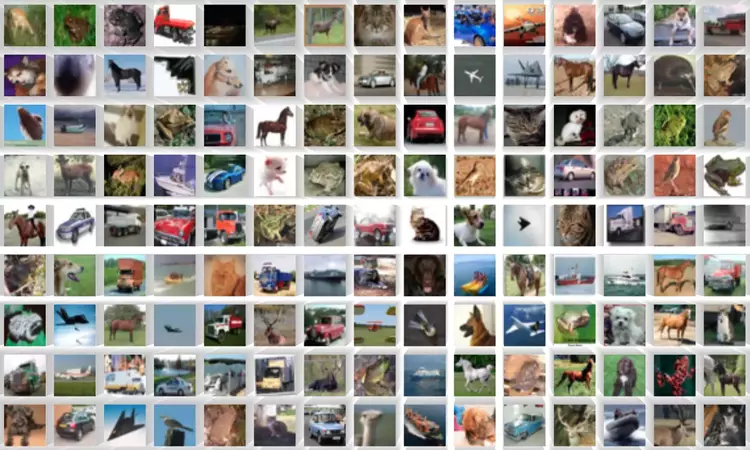

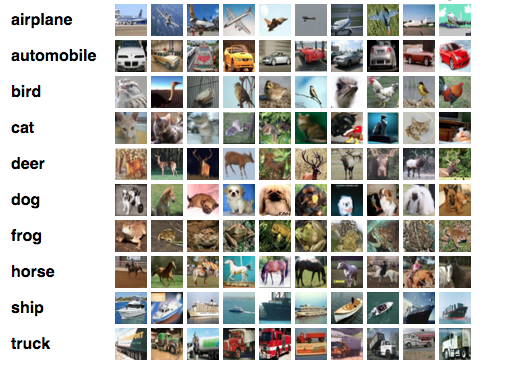

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [4]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  50000 images in the training dataset
There are  10000 images in the test dataset


The CIFAR-10 dataset The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [6]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

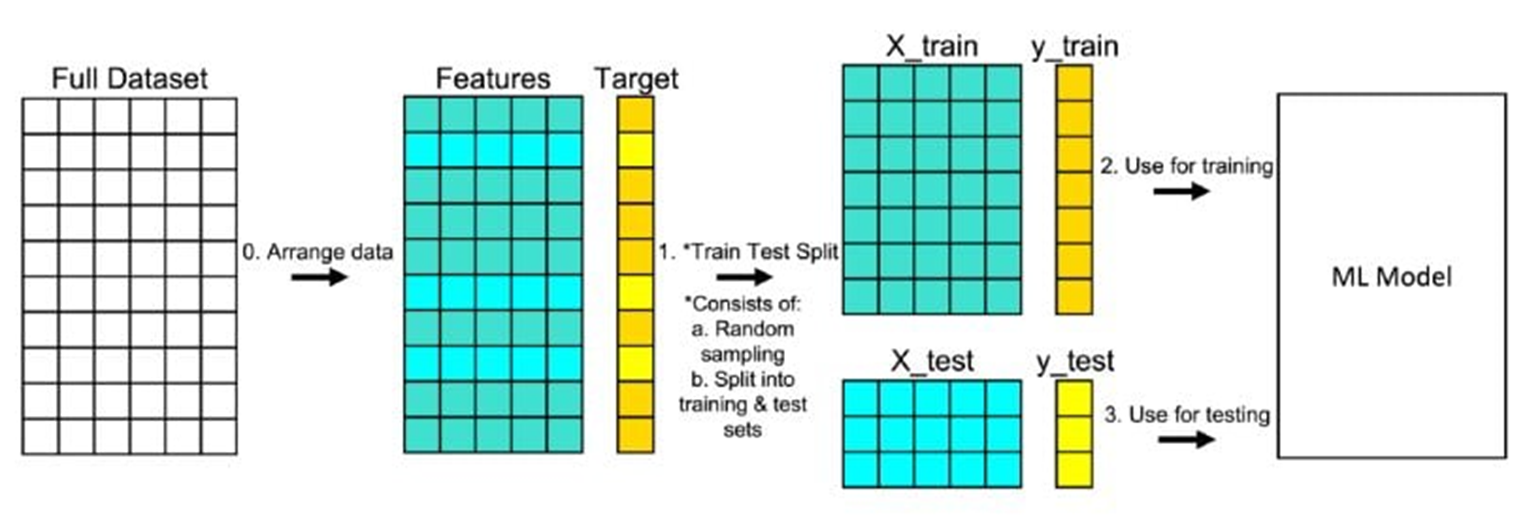

In [7]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

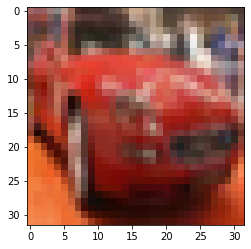

In [8]:
plt.imshow(X_train[5])

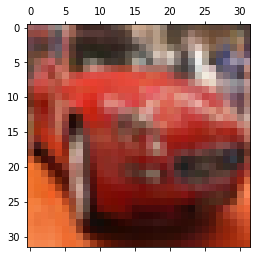

In [9]:
plt.matshow(X_train[5])

In [10]:
y_train[5]

array([1], dtype=uint8)

In [11]:
y_train.shape

(50000, 1)

In [12]:
y_train  # bunların hepsi birer skala değer, bu şekilde modele verirsek model bunun regresyon problem olduğunu düşünür. 

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
np.unique(y_train, return_counts=True)   # Array içindeki unique değerleri gösteriyor. 
#return_counts= True ile bu değerlerin sayılarını da görmüş oluyoruz.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

(array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000], dtype=int64) kısmı ise her bir sınıftaki örnek sayısını gösterir. Bu örnekte, her bir sınıfta 5000 örnek bulunmaktadır.

Class names:

0: Airplane

1: Automobile

2: Bird

3: Cat

4: Deer

5: Dog

6: Frog

7: Horse

8: Ship

9: Truck

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [17]:
y_train[33]

array([3], dtype=uint8)

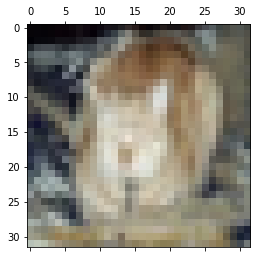

In [18]:
plt.matshow(X_train[33])

In [19]:
classes[int(y_train[33])]   # bunu indeksleyebiliyoruz. 

'cat'

In [20]:
int(np.random.randint(low=0, high=50000, size=1))  # 0 ile 50.000 arasında rastgele bir sayı döndürecek.

5455

In [21]:
np.random.randint(low=0, high=50000, size=17) 

array([36773, 23671, 28100, 18139, 37810, 46745, 22440, 27924, 24255,
       46068, 18528, 40477, 21762, 39358, 27889, 48982,  9450])

In [22]:
np.random.randint(low=0, high=50000, size=1)  # Array döndürüyor. 

array([18081])

In [23]:
X_train[int(np.random.randint(low=0, high=50000, size=1))]   # X Train içindeki bir resmi rastgele seçmiş oluyor. 

array([[[245, 248, 227],
        [227, 231, 205],
        [209, 214, 183],
        ...,
        [238, 240, 215],
        [240, 243, 219],
        [243, 246, 225]],

       [[240, 243, 220],
        [196, 201, 171],
        [159, 165, 129],
        ...,
        [210, 216, 188],
        [223, 228, 201],
        [240, 244, 220]],

       [[227, 231, 206],
        [159, 165, 130],
        [112, 119,  77],
        ...,
        [147, 159, 127],
        [178, 186, 157],
        [224, 229, 204]],

       ...,

       [[249, 246, 225],
        [230, 228, 207],
        [212, 210, 189],
        ...,
        [241, 244, 225],
        [243, 246, 226],
        [245, 248, 228]],

       [[252, 251, 230],
        [247, 245, 224],
        [244, 243, 222],
        ...,
        [247, 250, 225],
        [247, 250, 227],
        [247, 250, 228]],

       [[249, 250, 228],
        [246, 247, 225],
        [246, 247, 226],
        ...,
        [246, 248, 225],
        [246, 248, 226],
        [246, 248, 226]]

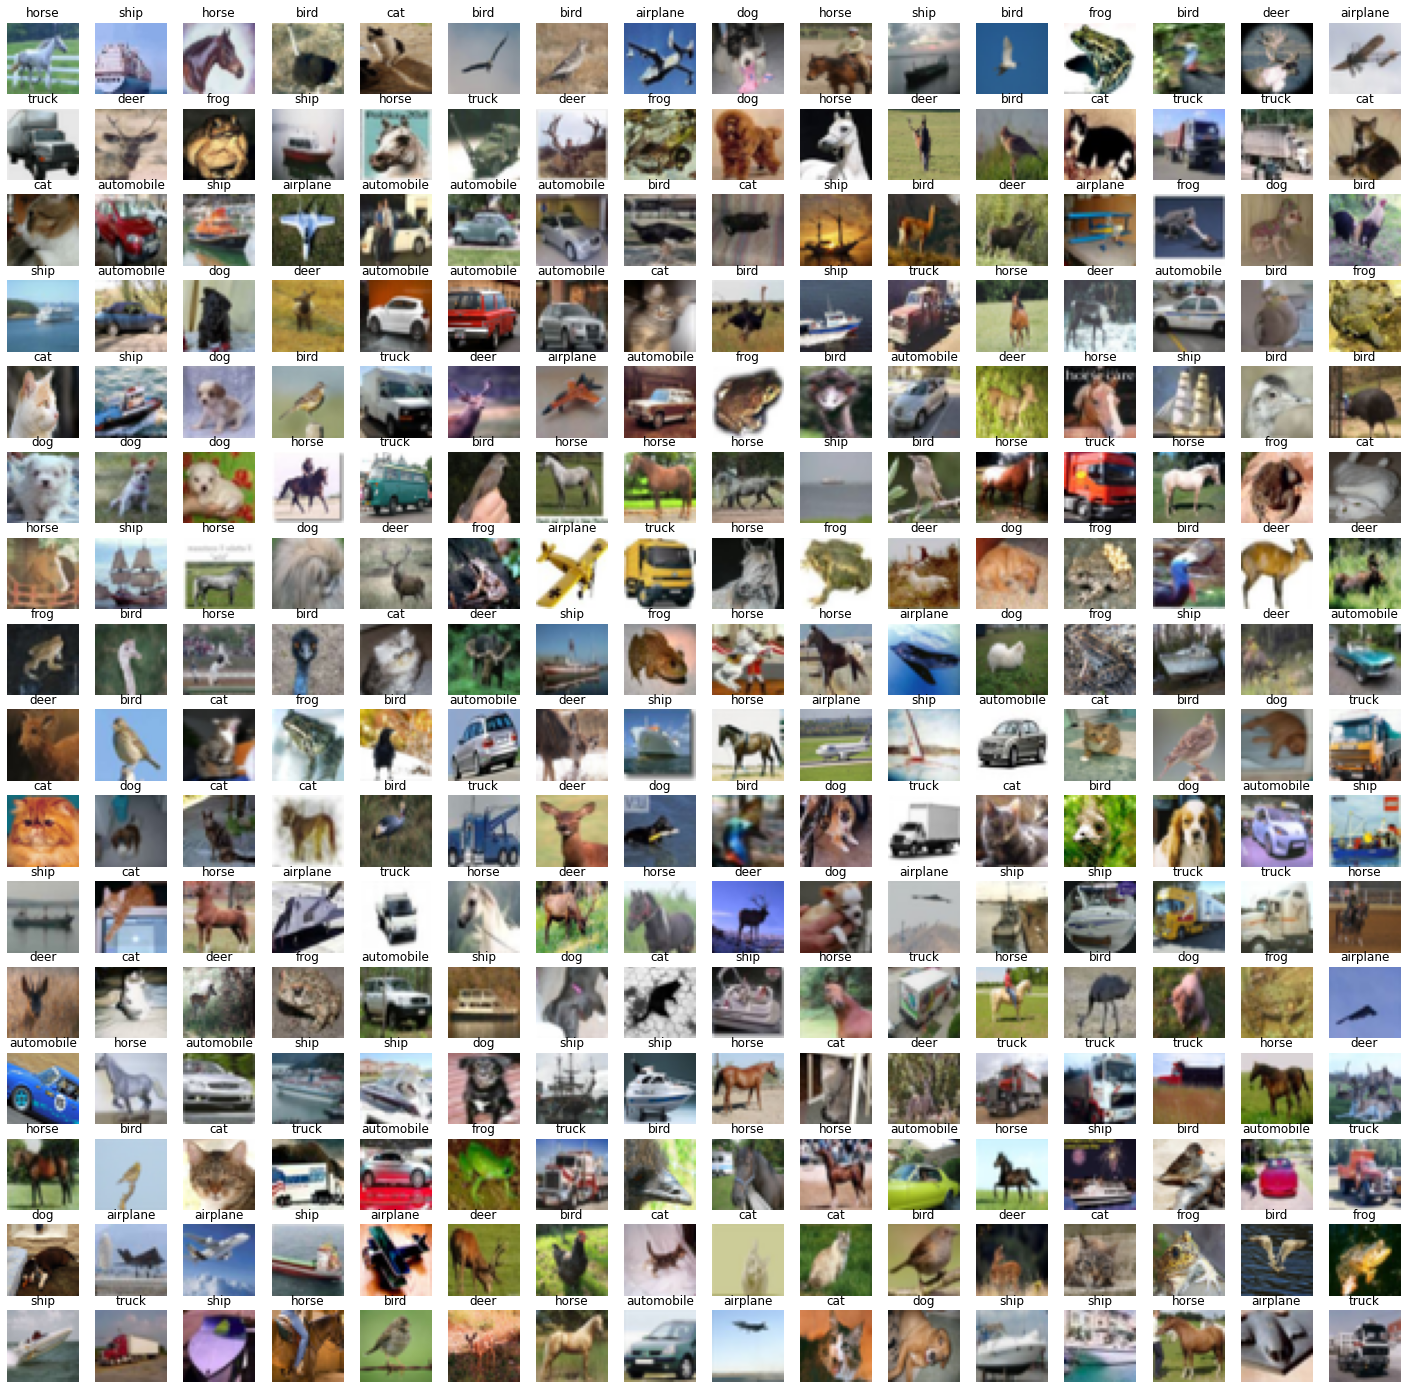

In [24]:
plt.figure(figsize=(25, 25))
for i in range(256):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(16, 16, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])    

# Data Preprocessing

In [25]:
X_train[5].min()

0

In [26]:
X_train[5].max()

252

In [27]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [28]:
X_train[5].min()

0.0

In [29]:
X_train[5].max()

0.9882353

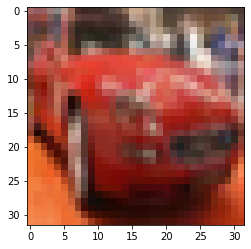

In [30]:
plt.imshow(X_train[5])

In [31]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [32]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

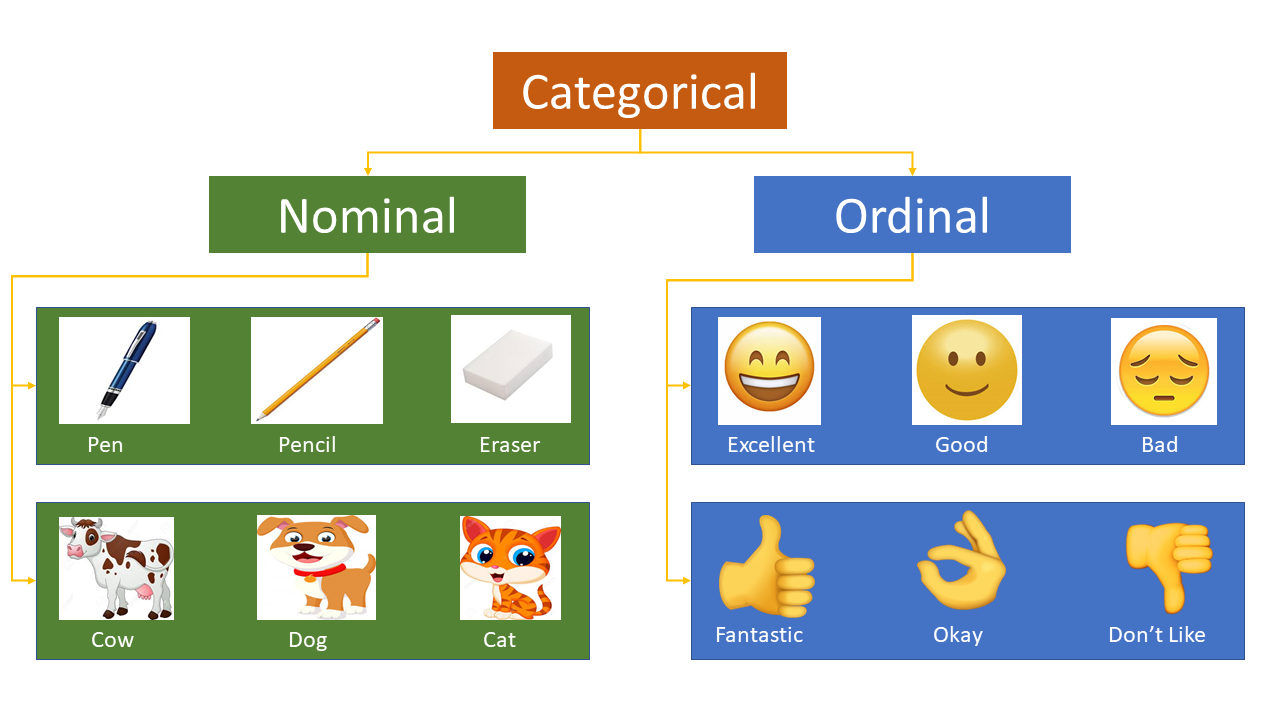

In [33]:
from tensorflow.keras.utils import to_categorical

In [34]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [36]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [40]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 213s 132ms/step - loss: 1.4255 - accuracy: 0.4822 - val_loss: 1.1165 - val_accuracy: 0.6009
Epoch 2/50
1563/1563 [==============================] - 187s 120ms/step - loss: 0.9886 - accuracy: 0.6522 - val_loss: 0.9528 - val_accuracy: 0.6698
Epoch 3/50
1563/1563 [==============================] - 196s 126ms/step - loss: 0.8245 - accuracy: 0.7109 - val_loss: 0.8681 - val_accuracy: 0.7060
Epoch 4/50
1563/1563 [==============================] - 227s 145ms/step - loss: 0.7222 - accuracy: 0.7453 - val_loss: 0.8492 - val_accuracy: 0.7062
Epoch 5/50
1563/1563 [==============================] - 185s 118ms/step - loss: 0.6416 - accuracy: 0.7761 - val_loss: 0.8159 - val_accuracy: 0.7286
Epoch 6/50
1563/1563 [==============================] - 184s 117ms/step - loss: 0.5689 - accuracy: 0.7994 - val_loss: 0.8240 - val_accuracy: 0.7289
Epoch 7/50
1563/1563 [==============================] - 180s 115ms/step - loss: 0.5107 - accuracy: 0.8205 - val_

In [41]:
model.metrics_names

['loss', 'accuracy']

In [42]:
model.history.history

{'loss': [1.4255363941192627,
  0.9886444807052612,
  0.8244801759719849,
  0.7222124338150024,
  0.6416023969650269,
  0.5689085721969604,
  0.510662317276001,
  0.45072636008262634,
  0.4062478244304657,
  0.35980963706970215],
 'accuracy': [0.4821600019931793,
  0.652180016040802,
  0.710860013961792,
  0.7453200221061707,
  0.7760999798774719,
  0.7994199991226196,
  0.8204799890518188,
  0.8400999903678894,
  0.8557800054550171,
  0.8717799782752991],
 'val_loss': [1.1164989471435547,
  0.9527818560600281,
  0.8681383728981018,
  0.8491626977920532,
  0.8158539533615112,
  0.8240026235580444,
  0.839713990688324,
  0.9251514673233032,
  0.9263172745704651,
  1.0557502508163452],
 'val_accuracy': [0.6008999943733215,
  0.6697999835014343,
  0.7059999704360962,
  0.7062000036239624,
  0.728600025177002,
  0.7289000153541565,
  0.7310000061988831,
  0.7182999849319458,
  0.7299000024795532,
  0.7141000032424927]}

In [43]:
summary = pd.DataFrame(model.history.history)
summary.head()

loss  accuracy  val_loss  val_accuracy
0  1.425536   0.48216  1.116499        0.6009
1  0.988644   0.65218  0.952782        0.6698
2  0.824480   0.71086  0.868138        0.7060
3  0.722212   0.74532  0.849163        0.7062
4  0.641602   0.77610  0.815854        0.7286

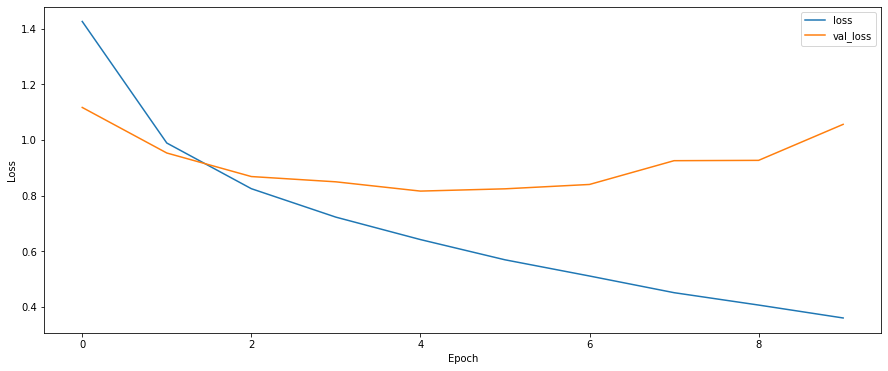

In [44]:
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

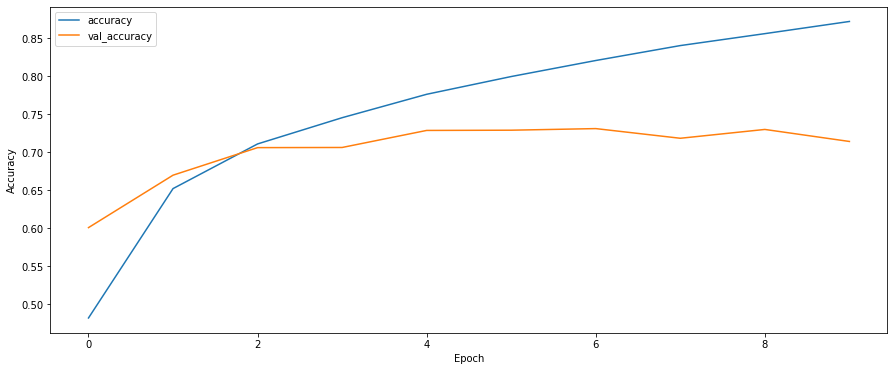

In [45]:
plt.figure(figsize=(15, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [46]:
print(model.evaluate(X_test, Y_test, verbose=1))

313/313 [==============================] - 14s 26ms/step - loss: 1.0558 - accuracy: 0.7141
[1.0557502508163452, 0.7141000032424927]


In [47]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [48]:
preds = model.predict(X_test)

In [49]:
predictions = np.argmax(preds, axis=1)

In [50]:
predictions

array([3, 8, 8, ..., 2, 1, 7], dtype=int64)

In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1000
           1       0.79      0.87      0.82      1000
           2       0.65      0.58      0.61      1000
           3       0.51      0.52      0.51      1000
           4       0.71      0.61      0.66      1000
           5       0.60      0.63      0.62      1000
           6       0.80      0.76      0.78      1000
           7       0.79      0.76      0.77      1000
           8       0.84      0.79      0.82      1000
           9       0.76      0.84      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [52]:
print(confusion_matrix(y_test, predictions))

[[777  37  38  25   8  10   4   5  60  36]
 [ 15 869   3   4   2   5   0   2  16  84]
 [ 92  12 579  74  67  57  63  23  19  14]
 [ 35  19  55 523  44 180  64  39  12  29]
 [ 32   9  69  76 611  68  39  74  12  10]
 [ 17   8  44 202  30 630  13  36   6  14]
 [ 17  16  48  58  40  23 762  11   9  16]
 [ 16   7  42  44  48  65   1 755   2  20]
 [ 69  50  11  17   7   8   3   4 793  38]
 [ 32  80   4  11   4   2   1   9  15 842]]


In [53]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0557502508163452
Test accuracy: 0.7141000032424927


In [54]:
my_image = X_test[44]

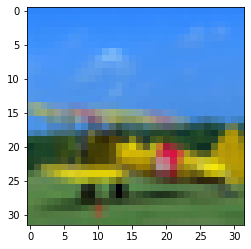

In [55]:
plt.imshow(my_image)

In [56]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

In [57]:
image_prediction

array([[9.8595113e-01, 3.2557151e-03, 1.6429978e-05, 1.7799866e-06,
        5.0881394e-04, 1.1797599e-06, 8.4116827e-08, 4.5428155e-06,
        2.1842511e-03, 8.0760019e-03]], dtype=float32)

In [58]:
np.argmax(image_prediction, axis=1)

array([0], dtype=int64)

In [59]:
result=np.argmax(image_prediction, axis=1)

In [60]:
result

array([0], dtype=int64)

In [61]:
classes[int(result)]

'airplane'

In [62]:
#model.save("cnn-1.h5")

In [63]:
early_stop = EarlyStopping(monitor='val_loss', patience=15)

Convolutional Neural Network (CNN) modelinde Dropout kullanarak ağın aşırı öğrenmeyi önlemesi mümkündür. Dropout, CNN'de de aynı şekilde çalışır: rastgele olarak bazı filtreleri devre dışı bırakarak özellik haritalarının çıktısını düzenler ve böylece ağın daha genel bir şekilde öğrenmesini sağlar.

CNN'de, özellik haritaları filtreler tarafından çıkarılır ve bu filtreler ağırlıklarını öğrenir. Dropout kullanarak bazı filtreleri rastgele olarak devre dışı bırakmak, ağın bu filtrelerin çıktılarına aşırı uyum sağlamasını önleyebilir ve böylece ağın daha genel bir şekilde öğrenmesini sağlayabilir.

In [64]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
        
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [66]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/100
1563/1563 [==============================] - 257s 159ms/step - loss: 1.3446 - accuracy: 0.5145 - val_loss: 0.9956 - val_accuracy: 0.6560
Epoch 2/100
1563/1563 [==============================] - 265s 169ms/step - loss: 0.9481 - accuracy: 0.6658 - val_loss: 0.8286 - val_accuracy: 0.7125
Epoch 3/100
1563/1563 [==============================] - 233s 149ms/step - loss: 0.8139 - accuracy: 0.7143 - val_loss: 0.7933 - val_accuracy: 0.7291
Epoch 4/100
1563/1563 [==============================] - 222s 142ms/step - loss: 0.7181 - accuracy: 0.7449 - val_loss: 0.7344 - val_accuracy: 0.7460
Epoch 5/100
1563/1563 [==============================] - 232s 149ms/step - loss: 0.6524 - accuracy: 0.7696 - val_loss: 0.7256 - val_accuracy: 0.7489
Epoch 6/100
1563/1563 [==============================] - 237s 152ms/step - loss: 0.5927 - accuracy: 0.7906 - val_loss: 0.6997 - val_accuracy: 0.7615
Epoch 7/100
1563/1563 [==============================] - 221s 142ms/step - loss: 0.5445 - accuracy: 0.8072

In [67]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8280802965164185
Test accuracy: 0.7738999724388123


In [68]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [69]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1000
           1       0.88      0.90      0.89      1000
           2       0.71      0.68      0.69      1000
           3       0.59      0.53      0.56      1000
           4       0.79      0.69      0.74      1000
           5       0.66      0.74      0.69      1000
           6       0.80      0.84      0.82      1000
           7       0.79      0.83      0.81      1000
           8       0.87      0.85      0.86      1000
           9       0.86      0.86      0.86      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [70]:
print(confusion_matrix(y_test, predictions))

[[813  17  50  10   8   7   4  11  52  28]
 [ 13 898   2   4   1   1   6   1  14  60]
 [ 64   3 676  48  54  52  52  29  13   9]
 [ 31   6  62 533  42 204  61  46   9   6]
 [ 17   0  60  70 693  46  45  59   6   4]
 [ 17   2  24 124  22 736  21  46   6   2]
 [  7   4  40  54  17  20 841   7   7   3]
 [ 12   3  24  38  33  44   3 834   2   7]
 [ 49  24  11  12   7   6  11   5 854  21]
 [ 19  63   6  10   3   7   4  12  15 861]]


<AxesSubplot: >

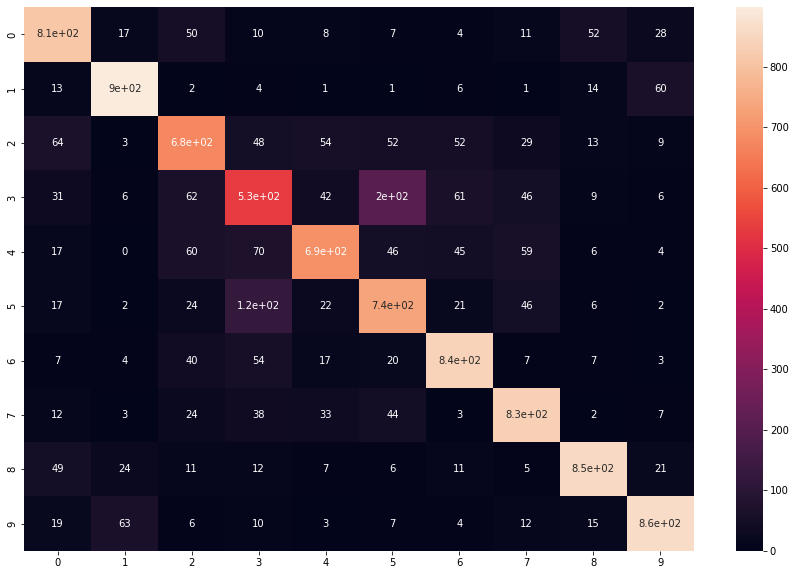

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [72]:
from tensorflow.keras.layers import BatchNormalization

In [73]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [74]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [75]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/100
1563/1563 [==============================] - 548s 338ms/step - loss: 1.5340 - accuracy: 0.4712 - val_loss: 1.1668 - val_accuracy: 0.5864
Epoch 2/100
1563/1563 [==============================] - 514s 329ms/step - loss: 0.9151 - accuracy: 0.6875 - val_loss: 0.8323 - val_accuracy: 0.7119
Epoch 3/100
1563/1563 [==============================] - 459s 294ms/step - loss: 0.7237 - accuracy: 0.7565 - val_loss: 0.8197 - val_accuracy: 0.7302
Epoch 4/100
1563/1563 [==============================] - 451s 289ms/step - loss: 0.6008 - accuracy: 0.7996 - val_loss: 0.6290 - val_accuracy: 0.7911
Epoch 5/100
1563/1563 [==============================] - 449s 288ms/step - loss: 0.4920 - accuracy: 0.8364 - val_loss: 0.6201 - val_accuracy: 0.7918
Epoch 6/100
1563/1563 [==============================] - 447s 286ms/step - loss: 0.4077 - accuracy: 0.8650 - val_loss: 0.6184 - val_accuracy: 0.8028
Epoch 7/100
1563/1563 [==============================] - 455s 291ms/step - loss: 0.3285 - accuracy: 0.8924

In [77]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7743725180625916
Test accuracy: 0.8271999955177307


In [78]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [79]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1000
           1       0.91      0.92      0.92      1000
           2       0.73      0.76      0.75      1000
           3       0.71      0.65      0.68      1000
           4       0.81      0.81      0.81      1000
           5       0.81      0.70      0.75      1000
           6       0.91      0.83      0.87      1000
           7       0.80      0.93      0.86      1000
           8       0.91      0.89      0.90      1000
           9       0.88      0.90      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

